In [2]:
#changing columns names to similar ones as the dataset!
import numpy as np
import pandas as pd

d=pd.read_csv("/content/data_capec_multilabel.csv")
d=d.rename(index=str, columns={'000 - Normal': 'normal'})
d=d.rename(index=str, columns={'272 - Protocol Manipulation': 'protocol manipulation'})
d=d.rename(index=str, columns={'242 - Code Injection': 'code injection'})
d=d.rename(index=str, columns={'88 - OS Command Injection': 'os command injection'})
d=d.rename(index=str, columns={'126 - Path Traversal': 'path traversal'})
d=d.rename(index=str, columns={'66 - SQL Injection': 'sql injection'})
d=d.rename(index=str, columns={'16 - Dictionary-based Password Attack': 'dictionary based password attack'})
d=d.rename(index=str, columns={'310 - Scanning for Vulnerable Software': 'scanning for vulnerable software'})
d=d.rename(index=str, columns={'153 - Input Data Manipulation': 'input data manipulation'})
d=d.rename(index=str, columns={'248 - Command Injection': 'command injection'})
d=d.rename(index=str, columns={'274 - HTTP Verb Tampering': 'http verb tampering'})
d=d.rename(index=str, columns={'194 - Fake the Source of Data': 'fake the source of data'})
d=d.rename(index=str, columns={'34 - HTTP Response Splitting': 'http response splitting'})
d=d.rename(index=str, columns={'33 - HTTP Request Smuggling': 'http request smuggling'})
d['request_referer'].value_counts().head()



http://test-site.com/                                           44
http://test-site.com/blog/index.php/my-account/edit-profile/    44
https://test-site.com/blog/index.php/my-account/                41
http://test-site.com/blog/index.php/.git                        16
http://test-site.com/blog/index.php/page/2/                     13
Name: request_referer, dtype: int64

In [3]:
print(d.shape)
print(d.info())

(6388, 38)
<class 'pandas.core.frame.DataFrame'>
Index: 6388 entries, 0 to 6387
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   timestamp                         6388 non-null   object 
 1   src_ip                            6388 non-null   object 
 2   src_port                          6388 non-null   int64  
 3   dst_ip                            6388 non-null   object 
 4   dst_port                          6388 non-null   int64  
 5   request_http_method               6388 non-null   object 
 6   request_http_request              6388 non-null   object 
 7   request_http_protocol             6388 non-null   object 
 8   request_user_agent                6385 non-null   object 
 9   request_referer                   715 non-null    object 
 10  request_host                      6384 non-null   object 
 11  request_origin                    10 non-null     object 
 12  

In [4]:
d=d[['timestamp','src_port','request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length','normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]

In [5]:
d.head(907814)
d1='updated.csv'
d.to_csv(d1,index=False)

In [6]:
d.isnull().sum()
#d['request_http_method'].value_counts()

#removing rows that are null
d=d.dropna(subset=['timestamp'])
d.isnull().sum()

#making response content length =0 for those rows which have null value
d['response_content_length'].fillna(0,inplace=True)
d['response_content_length']=d['response_content_length'].astype(int)
d.isnull().sum()
#d['request_http_method'].value_counts()

#d.to_csv(d2,index=False)
d2=d[['timestamp','src_port','request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length','normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]
d2.to_csv('new.csv',index=False)
d.isnull().sum()
#d2.describe()

timestamp                              0
src_port                               0
request_http_method                    0
request_http_request                   0
request_referer                     5673
request_user_agent                     3
request_cookie                      4753
request_accept                      3424
request_body                        6279
response_http_status_message           1
response_content_length                0
normal                                 1
protocol manipulation                  1
code injection                         1
os command injection                   1
path traversal                         1
sql injection                          1
dictionary based password attack       1
scanning for vulnerable software       1
input data manipulation                1
http verb tampering                    1
fake the source of data                1
http response splitting                1
http request smuggling                 1
dtype: int64

In [7]:
#Removing the duplicate rows
d2.duplicated(subset=None).sum()
exact_duplicates = d2[d2.duplicated(subset=None, keep=False)].head(5)
print(exact_duplicates)
#d2.isnull().sum()

Empty DataFrame
Columns: [timestamp, src_port, request_http_method, request_http_request, request_referer, request_user_agent, request_cookie, request_accept, request_body, response_http_status_message, response_content_length, normal, protocol manipulation, code injection, os command injection, path traversal, sql injection, dictionary based password attack, scanning for vulnerable software, input data manipulation, http verb tampering, fake the source of data, http response splitting, http request smuggling]
Index: []

[0 rows x 24 columns]


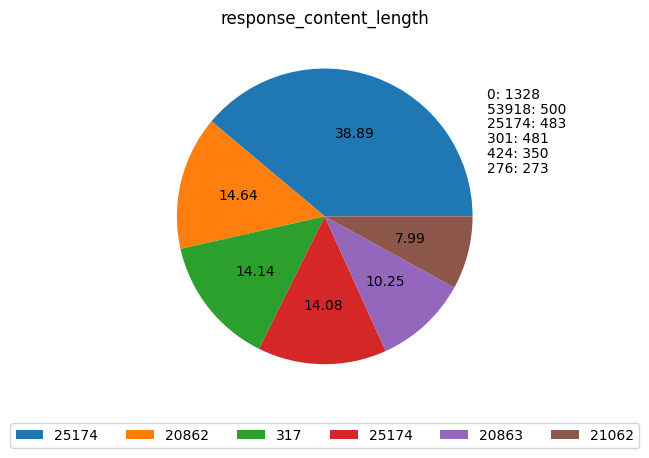

% values of response content length less than a particular choosen value
25.344395742016278
33.9542892924233
76.94113963681903
88.14965560425799
88.43143393863494
97.88666249217283


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


#sns.countplot(d2['response_content_length'])
#print(d2['response_content_length'].value_counts().sort_index())


# Assuming d2 is your DataFrame
top_colors = d2['response_content_length'].value_counts().nlargest(6)

# Plot the pie chart
plt.pie(top_colors, autopct='%.2f', labels=None)

# Create a separate text representation for the top 6 colors
for i, (label, count) in enumerate(zip(top_colors.index, top_colors)):
    plt.text(1.1, 0.8 - i * 0.1, f"{label}: {count}", fontsize=10, color='black', ha='left')

plt.legend(labels=d2['response_content_length'], loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=16)

plt.title("response_content_length")

plt.show()
print('% values of response content length less than a particular choosen value')
print((d2['response_content_length']<277).mean()*100)
print((d2['response_content_length']<400).mean()*100)
print((d2['response_content_length']<25000).mean()*100)
print((d2['response_content_length']<26000).mean()*100)
print((d2['response_content_length']<50000).mean()*100)
print((d2['response_content_length']<60000).mean()*100)

#jiski content length 277 se kam h uska percentage dikha rha h


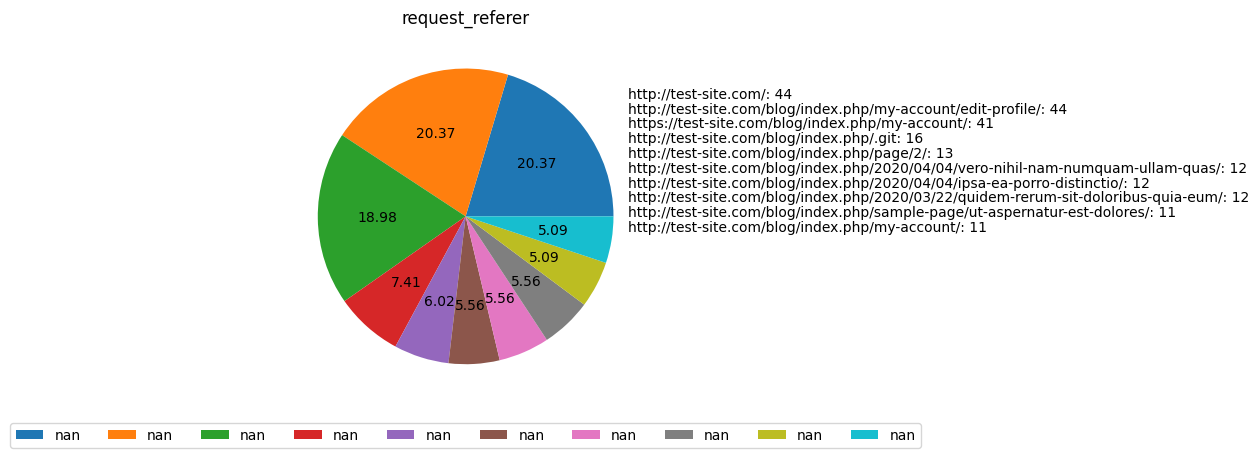

In [9]:
top_colors = d2['request_referer'].value_counts().nlargest(10)

# Plot the pie chart
plt.pie(top_colors, autopct='%.2f', labels=None)

# Create a separate text representation for the top 6 colors
for i, (label, count) in enumerate(zip(top_colors.index, top_colors)):
    plt.text(1.1, 0.8 - i * 0.1, f"{label}: {count}", fontsize=10, color='black', ha='left')

plt.legend(labels=d2['request_referer'], loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=16)


plt.title("request_referer")
plt.show()


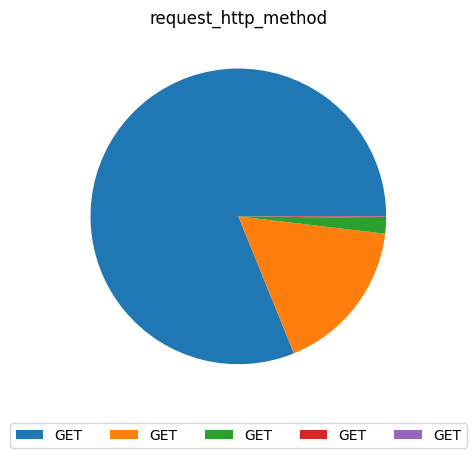

In [10]:
#top_colors = d2['request_http_method'].value_counts().nlargest(10)

# Plot the pie chart
plt.title("request_http_method")
plt.pie(d2['request_http_method'].value_counts())
plt.legend(labels=d2['request_http_method'], loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=16)


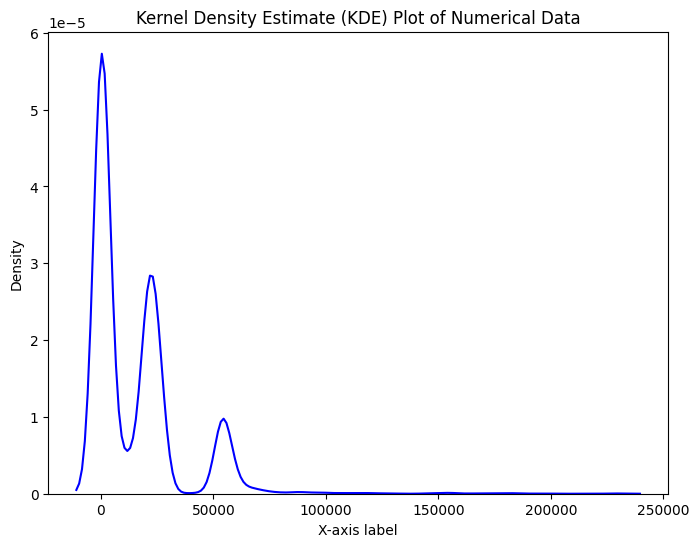

In [11]:
#KDE plot for reponse_content_length
plt.figure(figsize=(8, 6))
sns.kdeplot(d2['response_content_length'], color='blue')
plt.xlabel('X-axis label')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot of Numerical Data')
plt.show()

(array([4.895e+03, 7.510e+02, 6.570e+02, 4.000e+01, 1.500e+01, 8.000e+00,
        1.000e+01, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([     0. ,  22860.1,  45720.2,  68580.3,  91440.4, 114300.5,
        137160.6, 160020.7, 182880.8, 205740.9, 228601. ]),
 <BarContainer object of 10 artists>)

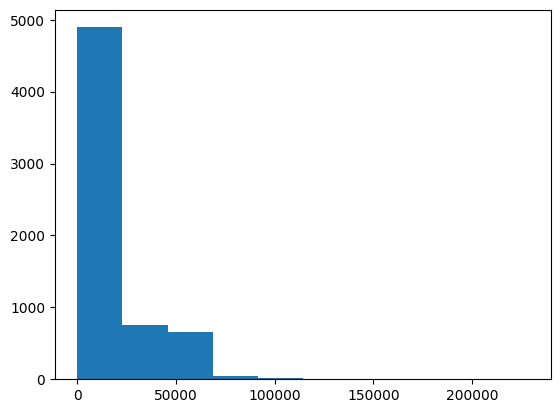

In [12]:
#hist
plt.hist(d2['response_content_length'])

Preprocessing

In [13]:
d2.columns

Index(['timestamp', 'src_port', 'request_http_method', 'request_http_request',
       'request_referer', 'request_user_agent', 'request_cookie',
       'request_accept', 'request_body', 'response_http_status_message',
       'response_content_length', 'normal', 'protocol manipulation',
       'code injection', 'os command injection', 'path traversal',
       'sql injection', 'dictionary based password attack',
       'scanning for vulnerable software', 'input data manipulation',
       'http verb tampering', 'fake the source of data',
       'http response splitting', 'http request smuggling'],
      dtype='object')

In [14]:
d2['request_http_method'].value_counts()

GET        5183
HEAD       1085
POST        109
OPTIONS      10
THBQ          1
Name: request_http_method, dtype: int64

In [15]:
d2['request_http_request'].value_counts().head(10)

/                                                                                     630
/blog/index.php/comments/feed/                                                        556
/blog/index.php/2020/04/04/hic-porro-nihil-non-rerum/                                 148
/blog/index.php/feed/                                                                 139
/blog/index.php/2020/04/04/ipsa-ea-porro-distinctio/                                  134
/blog/index.php/2020/04/04/voluptatum-reprehenderit-maiores-ab-sequi-quaerat/         120
/blog/                                                                                112
/blog/index.php/2020/04/04/nihil-tenetur-et-ad-in-dolores/                            105
/blog/index.php/2020/04/04/explicabo-qui-fuga-distinctio-dolores-voluptatibus-sit/    103
/blog/index.php/2020/04/04/tempore-odit-cupiditate-voluptas-laudantium-et-facilis/    100
Name: request_http_request, dtype: int64

In [16]:
d2['request_user_agent'].value_counts()

Mozilla/5.0 (X11; Linux x86_64; rv:70.0) Gecko/20100101 Firefox/70.0                                                                         1772
Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)                                                              1646
Mozilla/5.0 (X11; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0                                                                           43
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:40.0) Gecko/20100101 Firefox/40.0.2 Waterfox/40.0.2                                               10
Mozilla/5.0 (Linux; Android 4.4.2; RCT6203W46 Build/KOT49H) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.84 Safari/537.36            9
                                                                                                                                             ... 
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.104 AOL/9.8 AOLBuild/4346.13.US 

In [17]:
#what are the non_null values in the 'request_accept'
non_null_rows = d[d['request_accept'].notna()]#displaying all non null values
d['request_accept']
#count_encoding=d['request_http_method'].value_counts().to_dict()#doing frequency/count encoding
#d['request_http_method']=d['request_http_method'].map(count_encoding)
d['request_body'].value_counts()
d.isnull().sum()

filtered_d = d[(d['request_cookie'].isna()) & (d['normal'] == 1)]
print(filtered_d['request_accept'])
print(filtered_d.shape[0])

0       */*
1       */*
2       */*
3       */*
4       */*
       ... 
4825    NaN
4828    NaN
4829    NaN
4851    NaN
4857    NaN
Name: request_accept, Length: 2984, dtype: object
2984


In [18]:
non_null_rows = d[d['request_cookie'].notna()]#displaying all non null values
d['request_cookie']
#count_encoding=d['request_http_method'].value_counts().to_dict()#doing frequency/count encoding
#d['request_http_method']=d['request_http_method'].map(count_encoding)
d['request_body'].value_counts()
d.isnull().sum()

filtered_d = d[(d['request_cookie'].isna()) & (d['normal'] == 1)]
print(filtered_d['request_cookie'])
print(filtered_d.shape[0])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4825    NaN
4828    NaN
4829    NaN
4851    NaN
4857    NaN
Name: request_cookie, Length: 2984, dtype: object
2984


In [19]:
d2.isnull().sum()

timestamp                              0
src_port                               0
request_http_method                    0
request_http_request                   0
request_referer                     5673
request_user_agent                     3
request_cookie                      4753
request_accept                      3424
request_body                        6279
response_http_status_message           1
response_content_length                0
normal                                 1
protocol manipulation                  1
code injection                         1
os command injection                   1
path traversal                         1
sql injection                          1
dictionary based password attack       1
scanning for vulnerable software       1
input data manipulation                1
http verb tampering                    1
fake the source of data                1
http response splitting                1
http request smuggling                 1
dtype: int64

In [20]:
#dropping non null values
df_no_nulls = d2.dropna(subset=['request_referer'])

# Calculate value counts for the specific column
value_counts = df_no_nulls['request_referer'].value_counts()

# Define the prefix you want to filter by
prefix = 'http'

# Filter rows that start with the specified prefix
filtered_rows = df_no_nulls[df_no_nulls['request_referer'].str.startswith(prefix)]
print(len(filtered_rows))

714


In [22]:
#!pip install category_encoders
import category_encoders as ce
d3=d2[['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length','normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]
d3.to_csv('before_encoding.csv',index=False)

columns_to_encode = ['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message']
encoder = ce.CountEncoder(cols=columns_to_encode)
encoded_df = encoder.fit_transform(d3[columns_to_encode])
d3[columns_to_encode]=encoded_df
d3.to_csv('encoded_file.csv',index=False)
d4=pd.read_csv('encoded_file.csv')
d4.columns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 988.1 kB/s eta 0:00:00


<ipython-input-22-a63009dca017>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3[columns_to_encode]=encoded_df


Index(['request_http_method', 'request_http_request', 'request_referer',
       'request_user_agent', 'request_cookie', 'request_accept',
       'request_body', 'response_http_status_message',
       'response_content_length', 'normal', 'protocol manipulation',
       'code injection', 'os command injection', 'path traversal',
       'sql injection', 'dictionary based password attack',
       'scanning for vulnerable software', 'input data manipulation',
       'http verb tampering', 'fake the source of data',
       'http response splitting', 'http request smuggling'],
      dtype='object')

In [23]:
d4.isnull().sum()

request_http_method                 0
request_http_request                0
request_referer                     0
request_user_agent                  0
request_cookie                      0
request_accept                      0
request_body                        0
response_http_status_message        0
response_content_length             0
normal                              1
protocol manipulation               1
code injection                      1
os command injection                1
path traversal                      1
sql injection                       1
dictionary based password attack    1
scanning for vulnerable software    1
input data manipulation             1
http verb tampering                 1
fake the source of data             1
http response splitting             1
http request smuggling              1
dtype: int64

In [25]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Assuming 'd4' is your DataFrame

# Selecting features (X)
X = d4[['request_http_method', 'request_http_request', 'request_referer',
        'request_user_agent', 'request_cookie', 'request_accept',
        'request_body', 'response_http_status_message', 'response_content_length']]

# Targets (y)
y = d4[['normal', 'protocol manipulation', 'code injection', 'os command injection',
        'path traversal', 'sql injection', 'dictionary based password attack',
        'scanning for vulnerable software', 'input data manipulation', 'http verb tampering',
        'fake the source of data', 'http response splitting', 'http request smuggling']]

# Check and impute missing values
imputer_X = SimpleImputer(strategy='most_frequent')  # or another appropriate strategy
X = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)

imputer_y = SimpleImputer(strategy='constant', fill_value=0)
y = pd.DataFrame(imputer_y.fit_transform(y), columns=y.columns)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

# Fitting the RandomForest Classifier on the Training set
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)


In [27]:
# Evaluate the performance of the multi-label classification
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

print("Accuracy: ", accuracy)
print("F1 Score (Micro): ", f1)
print("Hamming Loss: ", hamming)
f1_macro = f1_score(y_test, y_pred, average='macro')
#print('f1(macro) ',f1_macro)

from sklearn.metrics import precision_score
precision_micro = precision_score(y_test, y_pred, average='micro')
print('precision micro ',precision_micro)

precision_macro = precision_score(y_test, y_pred, average='macro')
#print('precision macro ',precision_macro)

from sklearn.metrics import recall_score
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
print('recall micro ',recall_micro)
#print('recall_macro ',recall_macro)

from sklearn.metrics import roc_auc_score

# Convert sparse predictions to dense numpy arrays
#y_pred1_dense = y_pred.toarray()

# Calculate micro-average ROC AUC
micro_roc_auc = roc_auc_score(y_test, y_pred, average='micro')

print("Micro-Averaged ROC AUC:", micro_roc_auc)

from sklearn.metrics import jaccard_score

# Calculate micro-average Jaccard similarity
micro_jaccard = jaccard_score(y_test, y_pred, average='micro')

print("Micro-Averaged Jaccard Similarity:", micro_jaccard)

# Find the index corresponding to the 'normal' label
label='sql injection'
label_index = list(y_test.columns).index(label)

# Calculate TP, TN, FP, FN for the 'normal' label
TP = sum((y_test.iloc[:, label_index] == 1) & (y_pred[:, label_index] == 1))
FN = sum((y_test.iloc[:, label_index] == 1) & (y_pred[:, label_index] == 0))
TN = sum((y_test.iloc[:, label_index] == 0) & (y_pred[:, label_index] == 0))
FP = sum((y_test.iloc[:, label_index] == 0) & (y_pred[:, label_index] == 1))

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate Markedness
informedness = sensitivity + specificity - 1

#print("Sensitivity:", sensitivity)
#print("Specificity:", specificity)
print("Informedness:", informedness)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
negative_predictive_value = TN / (TN + FN) if (TN + FN) > 0 else 0

# Calculate Markedness
markedness = precision + negative_predictive_value - 1

#print("Precision:", precision)
#print("Negative Predictive Value:", negative_predictive_value)
print("Markedness:", markedness)


Accuracy:  0.9280125195618153
F1 Score (Micro):  0.9549754067347711
Hamming Loss:  0.007162633923197303
precision micro  0.9782945736434109
recall micro  0.9327420546932742
Micro-Averaged ROC AUC: 0.9654536562700364
Micro-Averaged Jaccard Similarity: 0.9138305575669804
Informedness: 0.0
Markedness: -0.0007824726134585402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Binary Relevance+ Random Forest

In [36]:

import pandas as pd
from sklearn.impute import SimpleImputer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'd4' is your DataFrame and it's already loaded

# Features (X)
X = d4[['request_http_method', 'request_http_request', 'request_referer',
        'request_user_agent', 'request_cookie', 'request_accept',
        'request_body', 'response_http_status_message', 'response_content_length']]

# Targets (y)
y = d4[['normal', 'protocol manipulation', 'code injection', 'os command injection',
        'path traversal', 'sql injection', 'dictionary based password attack',
        'scanning for vulnerable software', 'input data manipulation', 'http verb tampering',
        'fake the source of data', 'http response splitting', 'http request smuggling']]

# Impute missing values in y
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Using 0 to fill NaNs, adjust strategy as needed
y = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the BinaryRelevance classifier
classifier = BinaryRelevance(classifier=RandomForestClassifier(n_estimators=100, random_state=42), require_dense=[True, True])
classifier.fit(X_train, y_train)

# Continue with your prediction and evaluation steps...
y_pred = classifier.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without

'accuracy = accuracy_score(y_test, y_pred)\nf1 = f1_score(y_test, y_pred, average=\'micro\')\nhamming = hamming_loss(y_test, y_pred)\n\nprint("Accuracy: ", accuracy)\nprint("F1 Score (Micro): ", f1)\nprint("Hamming Loss: ", hamming)'

In [38]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-score (micro): {f1}")
print(f"Hamming Loss: {hamming_loss_value}")

Accuracy: 0.9280125195618153
F1-score (micro): 0.9549754067347711
Hamming Loss: 0.007162633923197303


In [39]:
f1_macro = f1_score(y_test, y_pred, average='macro')
print('f1(macro) ',f1_macro)

from sklearn.metrics import precision_score
precision_micro = precision_score(y_test, y_pred, average='micro')
print('precision micro ',precision_micro)

precision_macro = precision_score(y_test, y_pred, average='macro')
print('precision macro ',precision_macro)

from sklearn.metrics import recall_score
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
print('recall micro ',recall_micro)
print('recall_macro ',recall_macro)

from sklearn.metrics import roc_auc_score

# Convert sparse predictions to dense numpy arrays
y_pred1_dense = y_pred.toarray()

# Calculate micro-average ROC AUC
micro_roc_auc = roc_auc_score(y_test, y_pred1_dense, average='micro')

print("Micro-Averaged ROC AUC:", micro_roc_auc)

from sklearn.metrics import jaccard_score

# Calculate micro-average Jaccard similarity
micro_jaccard = jaccard_score(y_test, y_pred1_dense, average='micro')

print("Micro-Averaged Jaccard Similarity:", micro_jaccard)

f1(macro)  0.23851868546327595
precision micro  0.9782945736434109
precision macro  0.2671945890437877
recall micro  0.9327420546932742
recall_macro  0.23423106635590873
Micro-Averaged ROC AUC: 0.9654536562700364
Micro-Averaged Jaccard Similarity: 0.9138305575669804


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier Chain+Random Forest

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'd4' is your DataFrame

# Features (X)
X = d4[['request_http_method', 'request_http_request', 'request_referer',
        'request_user_agent', 'request_cookie', 'request_accept',
        'request_body', 'response_http_status_message', 'response_content_length']]

# Targets (y)
y = d4[['normal', 'protocol manipulation', 'code injection', 'os command injection',
        'path traversal', 'sql injection', 'dictionary based password attack',
        'scanning for vulnerable software', 'input data manipulation', 'http verb tampering',
        'fake the source of data', 'http response splitting', 'http request smuggling']]

# Impute missing values in y
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Fill NaN with 0, adjust as needed
y = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the ClassifierChain
base_classifier = RandomForestClassifier()
classifier_chain = ClassifierChain(base_classifier, order='random')
classifier_chain.fit(X_train, y_train)

# Make predictions
y_pred1 = classifier_chain.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred1)

print(f"Accuracy: {accuracy}")
print(f"F1-score (micro): {f1}")
print(f"Hamming Loss: {hamming_loss_value}")


Accuracy: 0.9280125195618153
F1-score (micro): 0.9549754067347711
Hamming Loss: 0.007162633923197303


In [ ]:
# import joblib as jl
# #running the cc_rf through pickle file

# jl.dump(classifier_chain,'clas_chain_rf.pkl')

# #import pandas as pd

# #from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, hamming_loss

# loaded_c=jl.load('clas_chain_rf.pkl')
# #d4=pd.read_csv('encoded_file.csv')
# y_pred = loaded_c.predict(X_test)


In [44]:

from sklearn.metrics import accuracy_score, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score, jaccard_score

# Assuming y_pred is the predictions from your classifier
# Convert sparse predictions to dense numpy arrays, if y_pred is a sparse matrix
if hasattr(y_pred, "toarray"):
    y_pred_dense = y_pred.toarray()
else:
    y_pred_dense = y_pred

# Performance metrics
accuracy = accuracy_score(y_test, y_pred_dense)
f1_micro = f1_score(y_test, y_pred_dense, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred_dense)

f1_macro = f1_score(y_test, y_pred_dense, average='macro')
precision_micro = precision_score(y_test, y_pred_dense, average='micro')
precision_macro = precision_score(y_test, y_pred_dense, average='macro')
recall_micro = recall_score(y_test, y_pred_dense, average='micro')
recall_macro = recall_score(y_test, y_pred_dense, average='macro')

micro_roc_auc = roc_auc_score(y_test, y_pred_dense, average='micro')
micro_jaccard = jaccard_score(y_test, y_pred_dense, average='micro')

# Print metrics
print('br+rf')
print(f"Accuracy: {accuracy}")
print(f"F1-score (Micro): {f1_micro}")
print(f"Hamming Loss: {hamming_loss_value}")
print(f"Precision Micro: {precision_micro}")
print(f"Recall Micro: {recall_micro}")
print(f"Micro-Averaged ROC AUC: {micro_roc_auc}")
print(f"Micro-Averaged Jaccard Similarity: {micro_jaccard}")

# Specific calculations for 'sql injection' label
label = 'sql injection'
label_index = list(y_test.columns).index(label)

TP = sum((y_test.iloc[:, label_index] == 1) & (y_pred_dense[:, label_index] == 1))
FN = sum((y_test.iloc[:, label_index] == 1) & (y_pred_dense[:, label_index] == 0))
TN = sum((y_test.iloc[:, label_index] == 0) & (y_pred_dense[:, label_index] == 0))
FP = sum((y_test.iloc[:, label_index] == 0) & (y_pred_dense[:, label_index] == 1))

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
informedness = sensitivity + specificity - 1

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
negative_predictive_value = TN / (TN + FN) if (TN + FN) > 0 else 0
markedness = precision + negative_predictive_value - 1

print(f"Informedness: {informedness}")
print(f"Markedness: {markedness}")


br+rf
Accuracy: 0.9280125195618153
F1-score (Micro): 0.9549754067347711
Hamming Loss: 0.007162633923197303
Precision Micro: 0.9782945736434109
Recall Micro: 0.9327420546932742
Micro-Averaged ROC AUC: 0.9654536562700364
Micro-Averaged Jaccard Similarity: 0.9138305575669804
Informedness: 0.0
Markedness: -0.0007824726134585402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



LGBM+Random Forest

In [46]:

from skmultilearn.problem_transform import BinaryRelevance
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'd4' is your DataFrame

# Features (X)
X = d4[['request_http_method', 'request_http_request', 'request_referer',
        'request_user_agent', 'request_cookie', 'request_accept',
        'request_body', 'response_http_status_message', 'response_content_length']]

# Targets (y)
y = d4[['normal', 'protocol manipulation', 'code injection', 'os command injection',
        'path traversal', 'sql injection', 'dictionary based password attack',
        'scanning for vulnerable software', 'input data manipulation', 'http verb tampering',
        'fake the source of data', 'http response splitting', 'http request smuggling']]

# Impute missing values in X
imputer_X = SimpleImputer(strategy='mean')  # Adjust the strategy as per your data's nature
X = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)

# Impute missing values in y
imputer_y = SimpleImputer(strategy='constant', fill_value=0)  # Using 0 to fill NaNs, adjust as needed
y = pd.DataFrame(imputer_y.fit_transform(y), columns=y.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the BinaryRelevance classifier with LightGBM
classifier_light = BinaryRelevance(classifier=LGBMClassifier(n_estimators=200, learning_rate=0.1), require_dense=[True, True])
classifier_light.fit(X_train, y_train)

# Make predictions
y_pred = classifier_light.predict(X_test)

# Evaluate the performance of the multi-label classification
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

print("Accuracy: ", accuracy)
print("F1 Score (Micro): ", f1)
print("Hamming Loss: ", hamming)


[LightGBM] [Info] Number of positive: 3130, number of negative: 1980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 5110, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612524 -> initscore=0.457936
[LightGBM] [Info] Start training from score 0.457936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [48]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score, jaccard_score

# Assuming y_pred is the predictions from your classifier
# Convert sparse predictions to dense numpy arrays, if y_pred is a sparse matrix
if hasattr(y_pred, "toarray"):
    y_pred_dense = y_pred.toarray()
else:
    y_pred_dense = y_pred

# Performance metrics
accuracy = accuracy_score(y_test, y_pred_dense)
f1_micro = f1_score(y_test, y_pred_dense, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred_dense)

f1_macro = f1_score(y_test, y_pred_dense, average='macro')
precision_micro = precision_score(y_test, y_pred_dense, average='micro')
precision_macro = precision_score(y_test, y_pred_dense, average='macro')
recall_micro = recall_score(y_test, y_pred_dense, average='micro')
recall_macro = recall_score(y_test, y_pred_dense, average='macro')

micro_roc_auc = roc_auc_score(y_test, y_pred_dense, average='micro')
micro_jaccard = jaccard_score(y_test, y_pred_dense, average='micro')

# Print metrics
print('br+rf')
print(f"Accuracy: {accuracy}")
print(f"F1-score (Micro): {f1_micro}")
print(f"Hamming Loss: {hamming_loss_value}")
print(f"Precision Micro: {precision_micro}")
print(f"Recall Micro: {recall_micro}")
print(f"Micro-Averaged ROC AUC: {micro_roc_auc}")
print(f"Micro-Averaged Jaccard Similarity: {micro_jaccard}")

# Specific calculations for 'sql injection' label
label = 'sql injection'
label_index = list(y_test.columns).index(label)

TP = sum((y_test.iloc[:, label_index] == 1) & (y_pred_dense[:, label_index] == 1))
FN = sum((y_test.iloc[:, label_index] == 1) & (y_pred_dense[:, label_index] == 0))
TN = sum((y_test.iloc[:, label_index] == 0) & (y_pred_dense[:, label_index] == 0))
FP = sum((y_test.iloc[:, label_index] == 0) & (y_pred_dense[:, label_index] == 1))

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
informedness = sensitivity + specificity - 1

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
negative_predictive_value = TN / (TN + FN) if (TN + FN) > 0 else 0
markedness = precision + negative_predictive_value - 1

print(f"Informedness: {informedness}")
print(f"Markedness: {markedness}")


br+rf
Accuracy: 0.9241001564945227
F1-score (Micro): 0.9527767283717415
Hamming Loss: 0.007523775129408932
Precision Micro: 0.9744976816074189
Recall Micro: 0.9320029563932003
Micro-Averaged ROC AUC: 0.9649202908563211
Micro-Averaged Jaccard Similarity: 0.9098124098124099
Informedness: 0.0
Markedness: -0.0007824726134585402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost+Random Forest

In [50]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'd4' is your DataFrame

# Features (X)
X = d4[['request_http_method', 'request_http_request', 'request_referer',
        'request_user_agent', 'request_cookie', 'request_accept',
        'request_body', 'response_http_status_message', 'response_content_length']]

# Targets (y)
y = d4[['normal', 'protocol manipulation', 'code injection', 'os command injection',
        'path traversal', 'sql injection', 'dictionary based password attack',
        'scanning for vulnerable software', 'input data manipulation', 'http verb tampering',
        'fake the source of data', 'http response splitting', 'http request smuggling']]

# Impute missing values in y
imputer_y = SimpleImputer(strategy='constant', fill_value=0)  # Filling NaNs with 0
y = pd.DataFrame(imputer_y.fit_transform(y), columns=y.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the BinaryRelevance classifier with AdaBoost
base_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
classifier = BinaryRelevance(classifier=base_classifier, require_dense=[True, True])
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the performance of the multi-label classification
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

print("Accuracy: ", accuracy)
print("F1 Score (Micro): ", f1)
print("Hamming Loss: ", hamming)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Accuracy:  0.9233176838810642
F1 Score (Micro):  0.9511918274687855
Hamming Loss:  0.007764535933550018


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [52]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score, jaccard_score

# Assuming y_pred is the predictions from your classifier
# Convert sparse predictions to dense numpy arrays, if y_pred is a sparse matrix
if hasattr(y_pred, "toarray"):
    y_pred_dense = y_pred.toarray()
else:
    y_pred_dense = y_pred

# Performance metrics
accuracy = accuracy_score(y_test, y_pred_dense)
f1_micro = f1_score(y_test, y_pred_dense, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred_dense)

f1_macro = f1_score(y_test, y_pred_dense, average='macro')
precision_micro = precision_score(y_test, y_pred_dense, average='micro')
precision_macro = precision_score(y_test, y_pred_dense, average='macro')
recall_micro = recall_score(y_test, y_pred_dense, average='micro')
recall_macro = recall_score(y_test, y_pred_dense, average='macro')

micro_roc_auc = roc_auc_score(y_test, y_pred_dense, average='micro')
micro_jaccard = jaccard_score(y_test, y_pred_dense, average='micro')

# Print metrics
print('br+rf')
print(f"Accuracy: {accuracy}")
print(f"F1-score (Micro): {f1_micro}")
print(f"Hamming Loss: {hamming_loss_value}")
print(f"Precision Micro: {precision_micro}")
print(f"Recall Micro: {recall_micro}")
print(f"Micro-Averaged ROC AUC: {micro_roc_auc}")
print(f"Micro-Averaged Jaccard Similarity: {micro_jaccard}")

# Specific calculations for 'sql injection' label
label = 'sql injection'
label_index = list(y_test.columns).index(label)

TP = sum((y_test.iloc[:, label_index] == 1) & (y_pred_dense[:, label_index] == 1))
FN = sum((y_test.iloc[:, label_index] == 1) & (y_pred_dense[:, label_index] == 0))
TN = sum((y_test.iloc[:, label_index] == 0) & (y_pred_dense[:, label_index] == 0))
FP = sum((y_test.iloc[:, label_index] == 0) & (y_pred_dense[:, label_index] == 1))

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
informedness = sensitivity + specificity - 1

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
negative_predictive_value = TN / (TN + FN) if (TN + FN) > 0 else 0
markedness = precision + negative_predictive_value - 1

print(f"Informedness: {informedness}")
print(f"Markedness: {markedness}")


br+rf
Accuracy: 0.9233176838810642
F1-score (Micro): 0.9511918274687855
Hamming Loss: 0.007764535933550018
Precision Micro: 0.9744186046511628
Recall Micro: 0.9290465631929047
Micro-Averaged ROC AUC: 0.9634420942561732
Micro-Averaged Jaccard Similarity: 0.9069264069264069
Informedness: 0.0
Markedness: -0.0007824726134585402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Label_Powerset+Random Forest

In [53]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = d4[['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length']]
y = d4[['normal','protocol manipulation','code injection','os command injection','path traversal',
        'sql injection','dictionary based password attack','scanning for vulnerable software',
        'input data manipulation','http verb tampering','fake the source of data',
        'http response splitting','http request smuggling']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelPowerset classifier with Random Forest as the base classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)
lp_classifier = LabelPowerset(classifier=rf_classifier)

# Train the LabelPowerset classifier
lp_classifier.fit(X_train, y_train)

# Make predictions
y_pred11 = lp_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [54]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
accuracy = accuracy_score(y_test, y_pred11)
f1 = f1_score(y_test, y_pred11, average='micro')
hamming = hamming_loss(y_test, y_pred11)

print("Accuracy: ", accuracy)
print("F1 Score (Micro): ", f1)
print("Hamming Loss: ", hamming)
f1_macro = f1_score(y_test, y_pred11, average='macro')
print('f1(macro) ',f1_macro)

from sklearn.metrics import precision_score
precision_micro = precision_score(y_test, y_pred11, average='micro')
print('precision micro ',precision_micro)

precision_macro = precision_score(y_test, y_pred11, average='macro')
print('precision macro ',precision_macro)

from sklearn.metrics import recall_score
recall_micro = recall_score(y_test, y_pred11, average='micro')
recall_macro = recall_score(y_test, y_pred11, average='macro')
print('recall micro ',recall_micro)
print('recall_macro ',recall_macro)

from sklearn.metrics import roc_auc_score

# Convert sparse predictions to dense numpy arrays
y_pred1_dense = y_pred11.toarray()

# Calculate micro-average ROC AUC
micro_roc_auc = roc_auc_score(y_test, y_pred1_dense, average='micro')

print("Micro-Averaged ROC AUC:", micro_roc_auc)


from sklearn.metrics import jaccard_score

# Calculate micro-average Jaccard similarity
micro_jaccard = jaccard_score(y_test, y_pred1_dense, average='micro')

print("Micro-Averaged Jaccard Similarity:", micro_jaccard)


Accuracy:  0.9280125195618153
F1 Score (Micro):  0.9534619750283769
Hamming Loss:  0.007403394727338389
f1(macro)  0.2379135513046714
precision micro  0.9767441860465116
precision macro  0.26719788825479424
recall micro  0.9312638580931264
recall_macro  0.2329544426013531
Micro-Averaged ROC AUC: 0.9646490314644912
Micro-Averaged Jaccard Similarity: 0.911062906724512


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi_Output+Random_forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score, jaccard_score
from sklearn.impute import SimpleImputer
import pandas as pd

# [rest of your code]


# Assuming 'd4' is your DataFrame

# Features (X) and Targets (y)
X = d4[['request_http_method', 'request_http_request', 'request_referer',
        'request_user_agent', 'request_cookie', 'request_accept',
        'request_body', 'response_http_status_message', 'response_content_length']]
y = d4[['normal', 'protocol manipulation', 'code injection', 'os command injection',
        'path traversal', 'sql injection', 'dictionary based password attack',
        'scanning for vulnerable software', 'input data manipulation', 'http verb tampering',
        'fake the source of data', 'http response splitting', 'http request smuggling']]

# Impute missing values in y
imputer_y = SimpleImputer(strategy='constant', fill_value=0)  # Filling NaNs with 0
y = pd.DataFrame(imputer_y.fit_transform(y), columns=y.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MultiOutputClassifier with RandomForest
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
classifier.fit(X_train, y_train)

# Make predictions
y_pred11 = classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred11)
f1_micro = f1_score(y_test, y_pred11, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred11)
f1_macro = f1_score(y_test, y_pred11, average='macro')
precision_micro = precision_score(y_test, y_pred11, average='micro')
precision_macro = precision_score(y_test, y_pred11, average='macro')
recall_micro = recall_score(y_test, y_pred11, average='micro')
recall_macro = recall_score(y_test, y_pred11, average='macro')

# Convert predictions to dense format if necessary
if hasattr(y_pred11, "toarray"):
    y_pred_dense = y_pred11.toarray()
else:
    y_pred_dense = y_pred11

# Calculate ROC AUC and Jaccard similarity
micro_roc_auc = roc_auc_score(y_test, y_pred_dense, average='micro')
micro_jaccard = jaccard_score(y_test, y_pred_dense, average='micro')

# Print metrics
print("Accuracy: ", accuracy)
print("F1 Score (Micro): ", f1_micro)
print("Hamming Loss: ", hamming_loss_value)
print('F1 (Macro): ', f1_macro)
print('Precision Micro: ', precision_micro)
print('Precision Macro: ', precision_macro)
print('Recall Micro: ', recall_micro)
print('Recall Macro: ', recall_macro)
print("Micro-Averaged ROC AUC: ", micro_roc_auc)
print("Micro-Averaged Jaccard Similarity: ", micro_jaccard)



Accuracy:  0.9280125195618153
F1 Score (Micro):  0.9549754067347711
Hamming Loss:  0.007162633923197303
F1 (Macro):  0.23851868546327595
Precision Micro:  0.9782945736434109
Precision Macro:  0.2671945890437877
Recall Micro:  0.9327420546932742
Recall Macro:  0.23423106635590873
Micro-Averaged ROC AUC:  0.9654536562700364
Micro-Averaged Jaccard Similarity:  0.9138305575669804


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results

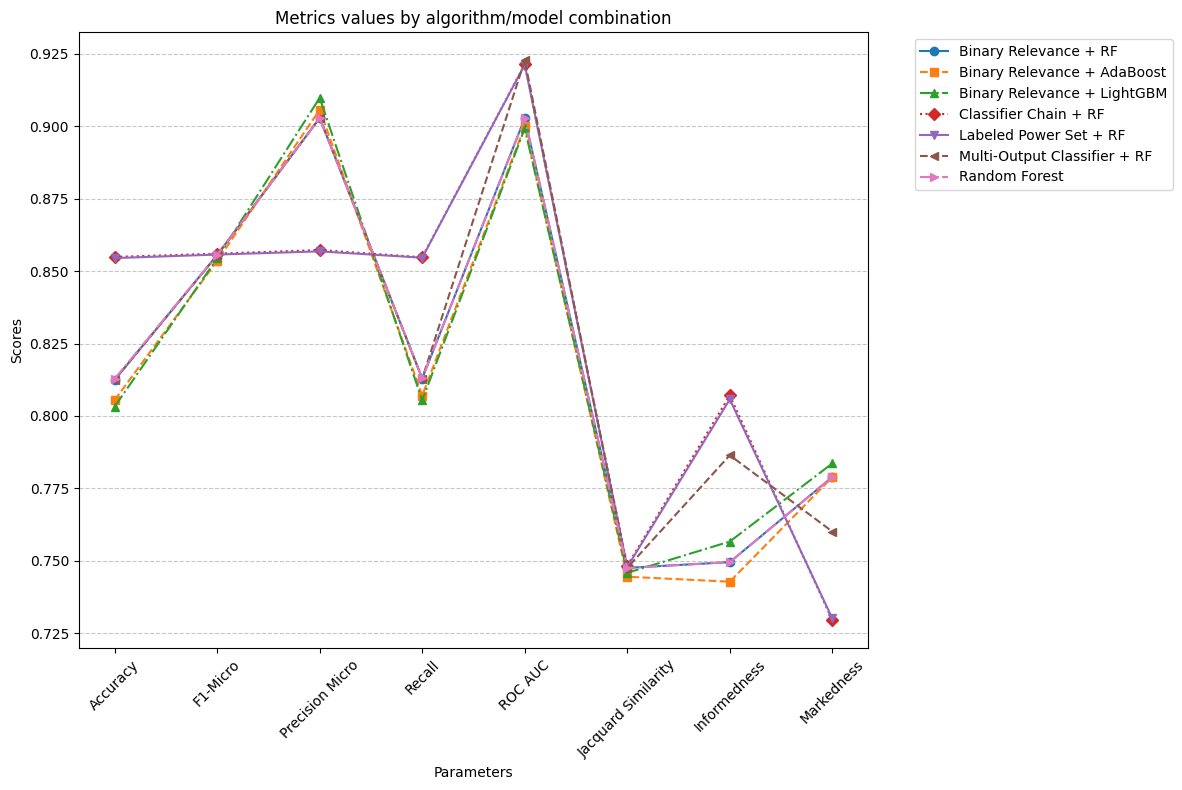

In [59]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = [
    "Binary Relevance + RF",
    "Binary Relevance + AdaBoost",
    "Binary Relevance + LightGBM",
    "Classifier Chain + RF",
    "Labeled Power Set + RF",
    "Multi-Output Classifier + RF",
    "Random Forest"
]

# Parameters
parameters = [
    "Accuracy",
    "F1-Micro",
    "Precision Micro",
    "Recall",
    "ROC AUC",
    "Jacquard Similarity",
    "Informedness",
    "Markedness"
]

# Scores
scores = [
    [0.81246, 0.85553, 0.90286, 0.81292, 0.90277, 0.74754, 0.74953, 0.77892],
    [0.80549, 0.85353,  0.90572, 0.80703, 0.89997, 0.74449, 0.74277, 0.77886],
    [0.80321, 0.85442, 0.90981, 0.80539, 0.89932, 0.74584, 0.75663, 0.78360],
    [0.85490, 0.85603,  0.85728, 0.85479, 0.92139, 0.74830, 0.80709, 0.72951],
    [0.85450, 0.85571,  0.85681, 0.85462, 0.92128, 0.74781, 0.80572, 0.73010],
    [0.81246    ,0.85553          ,0.90286   ,0.81292  ,0.92277   ,0.74754   ,0.78643  ,0.76010],
    [0.81285    ,0.85552          ,0.90279   ,0.81295  ,0.90278   ,0.74751   ,0.74953  ,0.77892]
]

# Plotting
plt.figure(figsize=(12, 8))

line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
markers = ['o', 's', '^', 'D', 'v', '<', '>']

for i in range(len(algorithms)):
    plt.plot(parameters, scores[i], label=algorithms[i], linestyle=line_styles[i], marker=markers[i])

plt.title('Metrics values by algorithm/model combination')
plt.xlabel('Parameters')
plt.ylabel('Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

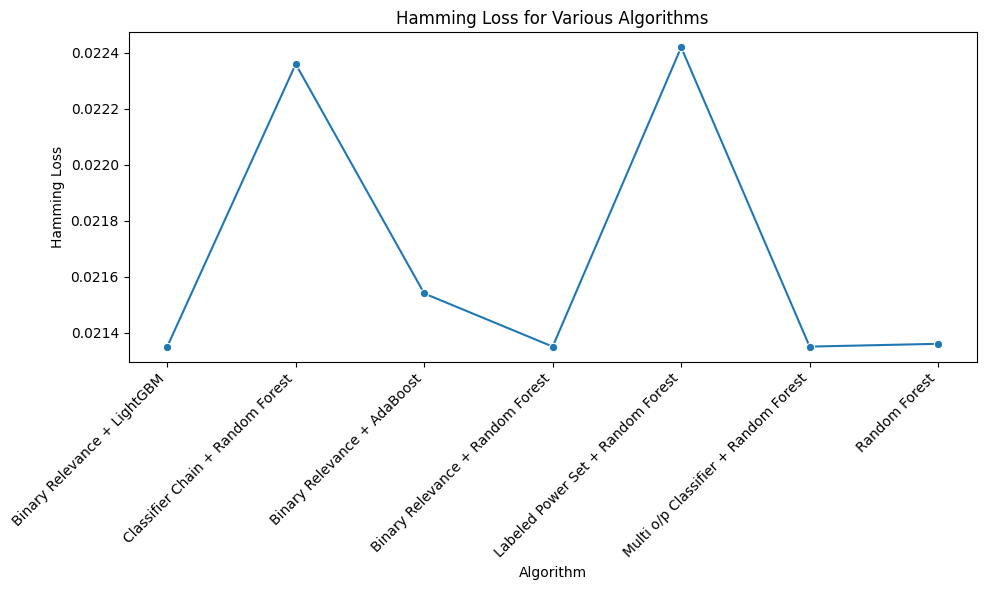

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
algorithms = [
    "Binary Relevance + LightGBM",
    "Classifier Chain + Random Forest",
    "Binary Relevance + AdaBoost",
    "Binary Relevance + Random Forest",
    "Labeled Power Set + Random Forest",
    "Multi o/p Classifier + Random Forest",
    "Random Forest"
]

hamming_loss_values = [0.02135, 0.02236, 0.02154, 0.02135, 0.02242, 0.02135,0.02136]

# Create a DataFrame
data = {"Algorithm": algorithms, "Hamming Loss": hamming_loss_values}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x="Algorithm", y="Hamming Loss", marker="o", data=df)
plt.title("Hamming Loss for Various Algorithms")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
from sklearn.compose import ColumnTransformer
from category_encoders import CountEncoder
from sklearn.preprocessing import OneHotEncoder

# Assuming trf is your transformer
trf = ColumnTransformer([
    ('trf', CountEncoder(), ['request_http_method','request_http_request','request_referer','request_user_agent',
                             'request_cookie','request_accept','request_body','response_http_status_message',
                             'response_content_length'])
])

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline



# Create a two-step pipeline with Binary Relevance
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', BinaryRelevance(classifier=RandomForestClassifier(n_estimators=100, random_state=42)))
])


In [62]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('trf',
                                                  CountEncoder(combine_min_nan_groups=True),
                                                  ['request_http_method',
                                                   'request_http_request',
                                                   'request_referer',
                                                   'request_user_agent',
                                                   'request_cookie',
                                                   'request_accept',
                                                   'request_body',
                                                   'response_http_status_message',
                                                   'response_content_length'])])),
                ('step2',
                 BinaryRelevance(classifier=RandomForestClassifier(random_state=42),
                                 require_dense=[True, True]))])